## Chapter5. 순환신경망 RNN
- 피드포워드 feed forward : 흐름이 단방향인 신경망
- 구성이 단순하고 구조를 이해하기 쉽고 많은 문제에 응용할 수 있다
- 단순한 피드포워드 신경망에서는 시계열 데이터의 성질(패턴)을 충분히 학습할 수 없다

### 1. 확률과 언어 모델

1.1 word2vec을 확률 관점에서
- CBOW는 사후 확률을 모델링. window size = 1 일때 CBOW 모델. $P(w_t|w_{t-1}, w_{t+1})$
- 맥락을 왼쪽 윈도우만으로 한정. $P(w_t|w_{t-2}, w_{t-1})$ 손실함수 $L = -logP(w_t|w_{t-2}, w_{t-1})$
- CBOW 모델을 학습시키는 목적은 맥락에서 타깃을 정확하게 추측하는 것
- 이 목적을 위해 학습을 진행하면 단어의 의미가 인코딩된 단어의 분산표현을 얻을 수 있다

1.2 언어 모델
- 언어 모델은 단어 나열에 확률을 부여. 특정 단어의 시퀀스가 일어날 가능성이 어느 정도인지를 확률로 평가
- 대표적인 예로 기계 번역과 음성 인식. 새로운 문장을 생성하는 용도(7장)
- m개의 단어로 된 문장 $w_1, \cdots, w_m$
- 1~m 순서로 출현할 확률은 $P(w_1, \cdots, w_m)$
- 동시 확률을 사후 확률을 사용하여 분해하면\
$P(w_1, \cdots, w_m) = P(w_m|w_1, \cdots, w_{m-1})P(w_{m-1}|w_1, \cdots, w_{m-2}) \cdots P(w_3|w_1,w_2) P(w_2|w_1) P(w_1)$\
$\Pi_{t=1}^{m}P(w_t|w_1, \cdots, w_{t-1})$

1.3 CBOW 모델을 언어 모델로?

- CBOW 모델을 언어 모델에 적용하면 맥락의 크기를 특정값으로 한정하여 근사적으로 나타낼 수 있다
- $P\left(w_1,\ \cdots ,\ w_m\right)\ =\ \prod _{t=1}^mP\left(w_t\mid w_1,\ \cdots ,\ w_{t-1}\right)\ \approx \ \prod _{t=1}^mP\left(w_t\mid w_{t-2},\ w_{t-1}\right)$
- 맥락을 왼쪽 2개의 단어로 한정하여 근사적으로 나타낼 수 있다
- 확률이 그 직전 N개의 사건에만 의존할 대, 이를 N층 마르코프 연쇄라고 한다. 위의 모델은 2층 마르코프 연쇄
- 맥락의 크기는 임의 길이로 설정할 수 있지면 결국 특정 길이로 고정
- 맥락 크기는 얼마든지 키울 수 있지만 CBOW 모델에서는 맥락 안의 단어 순서가 무시된다는 한계가 있다
- 맥락의 단어 순서도 고려한 모델이 바람직 → 맥락의 단어 벡터를 은닉층에 연결하는 방식(신경 확률론적 언어 모델 Neural Probabilistic Language Model) → 맥락의 크기에 비례해 가중치 매개변수도 늘어나게 된다
- RNN은 맥락이 아무리 길더라도 그 맥락의 정보를 기억. RNN을 사용하면 아무리 긴 시계열 데이터에라도 대응할 수 있다

### 2. RNN Recurrent Neural Network

2.1 순환하는 신경망
- 순환하기 위해서는 닫힌 경로가 필요
- 닫힌 경로 혹은 순환하는 경로가 존재해야 데이터가 같은 장소를 반복해 왕래할 수 있고 데이터가 순환하면서 정보가 끊임없이 갱신된다

2.2 순환구조 펼치기

- RNN계층의 순환 구조를 펼침으로써 오른쪽으로 성장하는 긴 신경망이 된다
- 이는 피드포워드 신경망과 같은 구조이지만, 다수의 RNN계층 모두가 실제로는 같은 계층인 것이 지금까지의 신경망과는 다르다
- 각 시각의 RNN계층은 그 계층의 입력과 1개 전의 RNN계층으로부터의 출력을 받는다
- $h_t\ =\ \tanh \left(h_{t-1}W_h+x_tW_x+b\right)$
- h는 상태를 기억해 시각이 1스탭 진행될 때마다 갱신. RNN의 출력 h를 은식상태 혹은 은닉상태벡터라 함

2.3 BPTT

- 순환 구조를 펼친 후의 RNN에는 일반적인 오차역전파법을 적용할 수 있다
- BPTT Backpropagation Through Time 시간 방향으로 펼친 신경망의 오차역전파
- 시계열 데이터를 학습할 때 시간 크기가 커지는 것에 비례하여 BPTT가 소비하는 컴퓨팅 자원 증가
- 시간 크기가 커지면 역전파 시의 기울기가 불안정

2.4 Truncated BPTT

- 큰 시계열 데이터 취급할 때 신경명 연결을 적당한 길이로 끊는다
- 시간축 방향으로 너무 길어진 신경망을 적당한 지점에서 잘라내어 작은 신경망 여러 개로 만든고 이 잘라낸 작은 신경망에서 오차역전파법을 수행
- 순전파의 흐름은 끊어지지 않고 전파하고 역전파의 연결은 적당한 길이로 잘라, 잘라낸 신경망 단위로 학습 수행
- 지금까지 신경망에서는 미니배치 학습을 수행할 때 데이터를 무작위로 선택해 입력하였으나 RNN에서 Truncated BPTT를 수행할 때는 데이터를 순서대로 입력해야 한다


2.5 Truncated BPTT의 미니배치 학습
- 데이터를 순서대로 제공
- 미니배치별로 데이터를 제공하는 시작위치를 옮기기

### 3. RNN 구현
- 길이가 T인 시계열 데이터를 받아 각 시각의 은닉 상태 T개 출력
- 모듈화를 위해 신경망을 하나의 계층으로 구현

3.1 RNN 계층 구현

In [1]:
class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        h_next = np.tanh(t)

        self.cache = (x, h_prev, h_next)
        return h_next

    def backward(self, dh_next):
        Wx, Wh, b = self.cache

        dt = dt_next * (1 - h_next ** 2)
        db = np.sum(dt, axis=0)
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmult(dt, Wh.T)
        dWx = np.matmul(x.T, dt)
        dx = np.matmul(dt, Wx.T)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        return dx, dh_prev

3.2 Time RNN 계층 구현

In [1]:
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.dh, = None, None
        self.stateful = stateful

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')
        
        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape

        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0,0,0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)  # 합산된 기울기
            dxs[:, t, :] = dx

            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh

        return dxs

### 4. 시계열 데이터 처리 계층 구현
- RNN 사용 언어 모델 구현

4.1 RNNLM RNN Language Model 의 전체 그림
- 첫 번째 층은 Embedding 계층. 단어 ID를 단어의 분산 표현(단어 벡터)으로 변환하여 RNN 계층으로 입력
- RNN 계층은 은닉 상태를 다음 층으로 출력함과 동시에, 다음 시각의 RNN 계층으로 출력
- RNN 계층이 위로 출력한 은닉 상태는 Affine 계층을 거쳐 Softmax 계층으로 전달됨
- RNN 계층이 과거에서 현재로 데이터를 계속 흘려보내줌으로써 과거의 정보를 인코딩해 저장(기억)

4.2 Time 계층 구현

In [2]:
class TimeEmbedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.layers = None
        self.W = W

    def forward(self, xs):
        N, T = xs.shape
        V, D = self.W.shape

        out = np.empty((N, T, D), dtype='f')
        self.layers = []

        for t in range(T):
            layer = Embedding(self.W)
            out[:, t, :] = layer.forward(xs[:, t])
            self.layers.append(layer)

        return out

    def backward(self, dout):
        N, T, D = dout.shape

        grad = 0
        for t in range(T):
            layer = self.layers[t]
            layer.backward(dout[:, t, :])
            grad += layer.grads[0]

        self.grads[0][...] = grad
        return None

In [3]:
class TimeAffine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        N, T, D = x.shape
        W, b = self.params

        rx = x.reshape(N*T, -1)
        out = np.dot(rx, W) + b
        self.x = x
        return out.reshape(N, T, -1)

    def backward(self, dout):
        x = self.x
        N, T, D = x.shape
        W, b = self.params

        dout = dout.reshape(N*T, -1)
        rx = x.reshape(N*T, -1)

        db = np.sum(dout, axis=0)
        dW = np.dot(rx.T, dout)
        dx = np.dot(dout, W.T)
        dx = dx.reshape(*x.shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx

In [4]:
class TimeSoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.cache = None
        self.ignore_label = -1

    def forward(self, xs, ts):
        N, T, V = xs.shape

        if ts.ndim == 3:  # 정답 레이블이 원핫 벡터인 경우
            ts = ts.argmax(axis=2)

        mask = (ts != self.ignore_label)

        # 배치용과 시계열용을 정리(reshape)
        xs = xs.reshape(N * T, V)
        ts = ts.reshape(N * T)
        mask = mask.reshape(N * T)

        ys = softmax(xs)
        ls = np.log(ys[np.arange(N * T), ts])
        ls *= mask  # ignore_label에 해당하는 데이터는 손실을 0으로 설정
        loss = -np.sum(ls)
        loss /= mask.sum()

        self.cache = (ts, ys, mask, (N, T, V))
        return loss

    def backward(self, dout=1):
        ts, ys, mask, (N, T, V) = self.cache

        dx = ys
        dx[np.arange(N * T), ts] -= 1
        dx *= dout
        dx /= mask.sum()
        dx *= mask[:, np.newaxis]  # ignore_label에 해당하는 데이터는 기울기를 0으로 설정

        dx = dx.reshape((N, T, V))

        return dx

### 5. RNNLM 학습과 평가

5.1 RNNLM 구현
- RNNLM에서 사용하는 신경망을 SimpleRnnlm 클래스로 구현

In [6]:
import sys
sys.path.append('D:/Python/14.밑바닥부터시작하는딥러닝/2/ch05')
import numpy as np
from common.time_layers import *

class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # weight initialization
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f') 
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f') 
        rnn_b = np.zeros(H).astype('f') 
        affine_W = (rn(H, V) / np.sqrt(H)).astyupe('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()

5.2 언어 모델의 평가
- 언어 모델은 주어진 과거 단어(정보)로부터 다음에 출현할 단어의 확률분포를 출력
- 언어의 예측 성능을 평가하는 척도로 퍼플렉서티(perplexity, 혼란도)를 자주 이용
- 퍼플렉서티는 간단히 말하면 확률의 역수
    - 예를들어 you 다음에 say가 올 확률이 0.8이라면 퍼플렉서티는 1/0.8 = 1.25
    - 작을수록 좋은값. 이 값은 분기수(number of branches)로 해석. 위의 1.25는 다음 출현단어 후보 1개에 근접
- 정보이론 분야에서는 퍼플렉서티를 기하평균 분기 수 라고도 한다
- 이는 데이터가 1개일때 설명한 분기 수를 데이터가 N개인 경우에서 평균한 것이라고 해석할 수 있다
- 입력 데이터가 여러개일 때의 퍼플렉서티<br><br>
$L\ =\ \frac{1}{N}\sum _n^{ }\sum _k^{ }t_{nk}\log y_{nk}$<br><br>
$perplexity = e^L$

5.3 RNNLM의 학습 코드
- PTB 데이터셋 이용 RNNLM 학습 수행
- PT 데이터셋 전부를 대상으로 학습하면 좋은 결과를 낼 수 없기 때문에 처음 1,000개 단어만 이용

In [8]:
import sys
sys.path.append('D:/Python/14.밑바닥부터시작하는딥러닝/2/ch05')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100   # RNN의 은닉 상태 벡터의 원소 수
time_size = 5       # Truncated BPTT 가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습데이터 읽기 (전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]    # 입력
ts = corpus[1:]     # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기 : %d, 어휘 수 : %d' % (corpus_size, vocab_size))

# 학습시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 1.각 미니매치에서 샘플을 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 2.미니배치 획득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 3.에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| epoch %d | perplexity %.2f' % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

말뭉치 크기 : 1000, 어휘 수 : 418
| epoch 1 | perplexity 400.70
| epoch 2 | perplexity 280.91
| epoch 3 | perplexity 228.78
| epoch 4 | perplexity 219.21
| epoch 5 | perplexity 207.24
| epoch 6 | perplexity 202.74
| epoch 7 | perplexity 198.01
| epoch 8 | perplexity 196.66
| epoch 9 | perplexity 191.27
| epoch 10 | perplexity 192.74
| epoch 11 | perplexity 188.06
| epoch 12 | perplexity 191.41
| epoch 13 | perplexity 188.93
| epoch 14 | perplexity 189.84
| epoch 15 | perplexity 187.81
| epoch 16 | perplexity 183.95
| epoch 17 | perplexity 181.39
| epoch 18 | perplexity 177.40
| epoch 19 | perplexity 178.55
| epoch 20 | perplexity 178.83
| epoch 21 | perplexity 176.79
| epoch 22 | perplexity 172.21
| epoch 23 | perplexity 168.80
| epoch 24 | perplexity 169.96
| epoch 25 | perplexity 166.83
| epoch 26 | perplexity 165.34
| epoch 27 | perplexity 159.91
| epoch 28 | perplexity 156.11
| epoch 29 | perplexity 153.33
| epoch 30 | perplexity 146.05
| epoch 31 | perplexity 148.15
| epoch 32 | perplexit

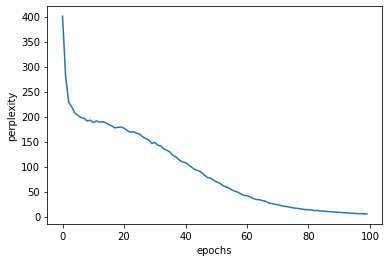

In [10]:
# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()

- 기본적으로 신경망 학습과 거의 유사. 다만 큰 관점에서 데이터 제공방법과 퍼플렉서티 계산이 다름
- 데이터 제공방법 : Truncated BPTT 방식으로 학습 수행
    - 1.에서 각 미니배치가 데이터를 읽기 시작하는 위치를 계산해 offsets에 저장
    - 2.에서는 데이터를 순차적으로 읽는다. batch_x와 batch_t 준비, time_idx를 순차적으로 늘리며 말뭉치에서 time_idx 위치 데이터를 얻는다
    - 여기에 offsets를 이용 각 미니배치에서 오프셋 추가
    - 또한 말뭉치를 읽는 위치가 말뭉치 크기를 넘어설 경우 말뭉치 크기로 나눈 인덱스 사용하여 처음으로 돌아온다
    - 3.에서는 에폭마다 손실의 평균을 구하고 그 값을 사용해 퍼플렉 서티를 구한다
- 학습을 진행할수록 퍼플렉서티가 순조롭게 낮아짐을 알수 있지만 실제로 현재의 모델로는 큰 말뭉치에 대응할 수 없다
- 이 문제는 다음장에서 개선

5.4 RNNLM의 Trainer 클래스

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 417.67
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 364.67
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 246.50
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 215.46
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 206.98
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 206.07
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 199.06
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.29
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 193.53
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.83
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.05
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 188.41
| 에폭 13 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.63
| 에폭 14 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 186.21
| 에폭 15 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 185.45
| 에폭 16 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.15
| 에폭 17 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 187.27
| 에폭 18 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 183.00
| 에폭 19 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 177.85
| 에폭 20 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 178.66
| 에폭 21 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 175.33
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 174.

c:\Users\GIGABYTE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\GIGABYTE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\GIGABYTE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\GIGABYTE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\GIGABYTE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\GIGABYTE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49

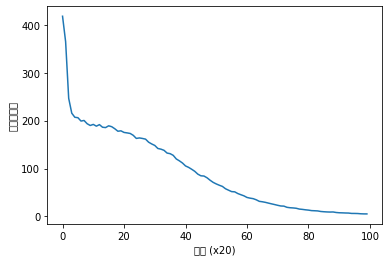

In [11]:
# chap05/train.py
%matplotlib inline
import sys
sys.path.append('D:/Python/14.밑바닥부터시작하는딥러닝/2/ch05')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()

### 6. 정리
- RNN은 순환하는 경로가 있고, 이를 통해 내부에 은닉상태를 기억할 수 있다
- RNN의 순환 경로를 펼침으로써 다수의 RNN계층이 연결된 신경망으로 해석할 수 있으며, 보통의 오차역전파법으로 학습할 수 있다(=BPTT)
- 긴 시계열 데이터를 학습할 때는 데이터를 적당한 길이씩 모으고(블록), 블록단위로 BPTT에 의한 학습을 수행한다(=Truncated BPTT)
- Truncated BPTT에서는 역전파의 연결만 끊고, 순전파의 연결을 유지하기 위해 데이터를 순차적으로 입력
- 언어 모델은 단어 시퀀스를 확률로 해석
- RNN 계층을 이용한 조건부 언어모델은 그때까지 등장한 모든 단어의 정보를 기억할 수 있다